In [1]:

import pandas as pd 
import numpy as np 

from matplotlib import pyplot as plt

from CV import CPCV as CPCV

from CV.util import StandardScaler, generate_xy_seq

from itertools import combinations

# Order 
1. X, Y generation 
2. CPCV baseline 
   어차피 여기서 뒤에서 개수만큼 잘라주는 거면 데이터 포인트를 자르는 것과 다를바 없음
3. Path return function
   


In [2]:
import pandas as pd
import numpy as np 

In [3]:
df = pd.read_csv("./data/data_input_demo.csv", index_col = [0])
df = df.set_index(['date'])[['13ty_index', 'interty_index', 'lty_index', 'mbs_index',\
       '13cy_index', 'intercy_index', 'lcy_index', 'ty_index', 'cy_index','agg_index']]
df.index = pd.to_datetime(df.index, format = '%Y-%m-%d')

In [4]:
df.head()

,13ty_index,interty_index,lty_index,mbs_index,13cy_index,intercy_index,lcy_index,ty_index,cy_index,agg_index
date,,,,,,,,,,
1997-05-19,133.46,784.22,840.64,751.37,668.10,893.58,912.47,824.23,861.00,715.66
1997-05-20,133.58,785.01,840.34,751.82,668.74,894.56,912.29,824.78,861.51,716.09
1997-05-21,133.59,784.63,836.47,751.97,668.77,893.58,908.76,823.54,859.71,715.31
1997-05-22,133.58,784.33,834.66,751.97,668.71,892.96,906.86,822.86,858.69,714.88
1997-05-23,133.58,784.70,835.59,752.27,668.71,893.58,907.77,823.37,859.37,715.31


## X, Y generation 

In [5]:
past_seq = 66
future_seq = 22
num_assets = df.shape[1]
X, Y, X_date, Y_date = generate_xy_seq(df, x_seq = past_seq, y_seq = future_seq)

In [6]:
X.shape

(6298, 66, 10)

In [7]:
Y.shape

(6298, 22, 10)

In [8]:
X.shape

(6298, 66, 10)

In [9]:
X_date

array([['1997-05-19T00:00:00.000000000', '1997-05-20T00:00:00.000000000',
        '1997-05-21T00:00:00.000000000', ...,
        '1997-08-14T00:00:00.000000000', '1997-08-15T00:00:00.000000000',
        '1997-08-18T00:00:00.000000000'],
       ['1997-05-20T00:00:00.000000000', '1997-05-21T00:00:00.000000000',
        '1997-05-22T00:00:00.000000000', ...,
        '1997-08-15T00:00:00.000000000', '1997-08-18T00:00:00.000000000',
        '1997-08-19T00:00:00.000000000'],
       ['1997-05-21T00:00:00.000000000', '1997-05-22T00:00:00.000000000',
        '1997-05-23T00:00:00.000000000', ...,
        '1997-08-18T00:00:00.000000000', '1997-08-19T00:00:00.000000000',
        '1997-08-20T00:00:00.000000000'],
       ...,
       ['2021-07-05T00:00:00.000000000', '2021-07-06T00:00:00.000000000',
        '2021-07-07T00:00:00.000000000', ...,
        '2021-09-30T00:00:00.000000000', '2021-10-01T00:00:00.000000000',
        '2021-10-04T00:00:00.000000000'],
       ['2021-07-06T00:00:00.000000000', '20

In [10]:
Y_date

array([['1997-08-19T00:00:00.000000000', '1997-08-20T00:00:00.000000000',
        '1997-08-21T00:00:00.000000000', ...,
        '1997-09-15T00:00:00.000000000', '1997-09-16T00:00:00.000000000',
        '1997-09-17T00:00:00.000000000'],
       ['1997-08-20T00:00:00.000000000', '1997-08-21T00:00:00.000000000',
        '1997-08-22T00:00:00.000000000', ...,
        '1997-09-16T00:00:00.000000000', '1997-09-17T00:00:00.000000000',
        '1997-09-18T00:00:00.000000000'],
       ['1997-08-21T00:00:00.000000000', '1997-08-22T00:00:00.000000000',
        '1997-08-25T00:00:00.000000000', ...,
        '1997-09-17T00:00:00.000000000', '1997-09-18T00:00:00.000000000',
        '1997-09-19T00:00:00.000000000'],
       ...,
       ['2021-10-05T00:00:00.000000000', '2021-10-06T00:00:00.000000000',
        '2021-10-07T00:00:00.000000000', ...,
        '2021-11-01T00:00:00.000000000', '2021-11-02T00:00:00.000000000',
        '2021-11-03T00:00:00.000000000'],
       ['2021-10-06T00:00:00.000000000', '20

In [11]:
sample_info_sets = pd.Series(index=df[:-(past_seq+future_seq-1)].index, data=df[(past_seq+future_seq-1):].index)

In [12]:
sample_info_sets

date
1997-05-19   1997-09-17
1997-05-20   1997-09-18
1997-05-21   1997-09-19
1997-05-22   1997-09-22
1997-05-23   1997-09-23
                ...    
2021-07-01   2021-11-01
2021-07-02   2021-11-02
2021-07-05   2021-11-03
2021-07-06   2021-11-04
2021-07-07   2021-11-05
Name: date, Length: 6298, dtype: datetime64[ns]

# CPCV with Training Process

In [13]:

from CV.dataformatter import DataLoaderSet
import torch 
from torch import nn 

In [14]:
X.shape

(6298, 66, 10)

In [15]:
Y.shape

(6298, 22, 10)

# Base Model 

In [16]:
class LSTM_Model(nn.Module):
    def __init__(self, num_assets, past_seq, future_seq, num_layers, device):
        '''
        '''
        super(LSTM_Model, self).__init__()
        self.device = device
        self.num_layers = num_layers
        
        self.lstm_in_dim = num_assets
        self.lstm_out_dim = num_assets 
        
        self.fc_in_dim = past_seq
        self.fc_out_dim = future_seq

## LSTM 정의 
        self.lstm = nn.LSTM(self.lstm_in_dim, self.lstm_out_dim, num_layers = self.num_layers, batch_first = True)
        self.fc = nn.Conv2d(self.fc_in_dim, self.fc_out_dim, kernel_size= (1,1))        
        
    def forward(self, x):
        '''
        x: [batch size, past sequence]
        '''
        batch_size = x.size(0)
## 초기 hidden state, cell state 정의해주기 : 0으로 준다
        hidden_init = torch.zeros(self.num_layers, batch_size, self.lstm_out_dim).to(self.device)
        cell_init = torch.zeros(self.num_layers, batch_size, self.lstm_out_dim).to(self.device)
        
        output, hidden = self.lstm(x, (hidden_init, cell_init))
        prediction = output.unsqueeze(-1)
        
####### 예측길이 바꿔주고 싶을 때 실행        
        prediction = self.fc(prediction)
        prediction = prediction.squeeze()
        
        return prediction         
        

In [17]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print ("Use gpu")
else:
    device = torch.device("cpu")
    print ("Use cpu")

Use gpu


In [18]:
# Model related hyper-parameters 
num_assets = df.shape[-1]
num_layers = 1 
num_epochs = 100

######### Model 을 정의하는 부분 ########
print ("** Model Loading **")
Model = LSTM_Model(num_assets, past_seq, future_seq, num_layers, device)

Model.to(device)

criterion = nn.L1Loss() # Loss function 을 정의: MAE
optimizer = torch.optim.Adam(Model.parameters(), lr = 0.01) # optimizer 을 설정

** Model Loading **


In [19]:
# Training related hyper-parameters
batch_num = 32
epoch_num = 30

## CPCV Loading

In [20]:
total_split_num = 6
val_split_num = 2
pct_embargo = 0.01
purge_behind = True


folds = [i for i in range(total_split_num)]
val_comb = list(combinations(folds, val_split_num))
train_split_num = total_split_num - val_split_num
path_fold_num  = train_split_num + 1 # 한 path 에 존재하는 fold 의 개수 / train_split_num + 1  = 5
path_num = int(len(val_comb) * val_split_num / total_split_num) # 전체 path 의 개수 = path_fold_num 

cv_gen = CPCV.CombinatorialPurgedKFold(n_splits=total_split_num,
                         n_valid_splits = val_split_num, 
                         samples_info_sets=sample_info_sets, 
                         pct_embargo=pct_embargo,
                         purge_behind= purge_behind)

cv_split = cv_gen.split(X,Y)

In [21]:
loader_params = {'batch_size': 32,
                 'shuffle':True,
                 'device':'cuda:0'}

In [22]:
val_comb

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 3),
 (2, 4),
 (2, 5),
 (3, 4),
 (3, 5),
 (4, 5)]

# Training

In [23]:

total_loss = [0 for _ in range(path_num)]

for idx, (path_ind_ls, train_ind, valid_ind_set) in enumerate(cv_split): # 결국 순서대로 -> 순서 자체가 train model number
    
    print ('Split Number:', idx)
    # MODEL INIT
    ######### Model 을 정의하는 부분 ########
    print ("** Model Loading **")
    Model = LSTM_Model(num_assets, past_seq, future_seq, num_layers, device)

    Model.to(device)

    criterion = nn.L1Loss() # Loss function 을 정의합니다 : MAE
    optimizer = torch.optim.Adam(Model.parameters(), lr = 0.01) # optimizer 을 설정해 줍니다. 
    
    # DataLoader 
    print ("DataLoader generation...")
    LoaderGenerator = DataLoaderSet(X, Y, X_date, Y_date, path_ind_ls, train_ind, valid_ind_set, loader_params)
    loader_set = LoaderGenerator.dataloader
    
    # scaler2 for prediction during training
    mean2 = torch.from_numpy(LoaderGenerator.scaler.mean).to(device)
    std2 = torch.from_numpy(LoaderGenerator.scaler.std).to(device)

    scaler2 = StandardScaler(mean2, std2)
    # TRAIN     
    # Epoch 
    print ("Training...")
    for epoch in range(epoch_num):
        Model.train()
        epoch_train_loss = []
        
        train_loader = loader_set['train_loader']
        for train_x, train_y, dates in train_loader.get_iterator():
            
            train_pred = Model(train_x)
            
            train_pred = scaler2.inverse_transform(train_pred)
            
            loss_train = criterion(train_pred, train_y)
            loss_train.backward()
            optimizer.step()
            optimizer.zero_grad()
    
    # Validation 
    print ("Validation...")
    Model.eval()
    valid_loader_set = loader_set['valid_loader']
    
    for path_num in list(valid_loader_set.keys()):
        # print ("Path num: ", path_num)
        n_valid_loader = valid_loader_set[path_num]
        for valid_x, valid_y, dates in n_valid_loader.get_iterator():
            val_pred = Model(valid_x)
            val_pred = scaler2.inverse_transform(val_pred)
            
            val_loss = criterion(val_pred, valid_y)
            
            total_loss[path_num] += val_loss
            
for i in range(len(total_loss)):
    total_loss[i] /= total_split_num

Split Number: 0
** Model Loading **
DataLoader generation...
Training...
Validation...
Split Number: 1
** Model Loading **
DataLoader generation...
Training...
Validation...
Split Number: 2
** Model Loading **
DataLoader generation...
Training...
Validation...
Split Number: 3
** Model Loading **
DataLoader generation...
Training...
Validation...
Split Number: 4
** Model Loading **
DataLoader generation...
Training...
Validation...
Split Number: 5
** Model Loading **
DataLoader generation...
Training...
Validation...
Split Number: 6
** Model Loading **
DataLoader generation...
Training...
Validation...
Split Number: 7
** Model Loading **
DataLoader generation...
Training...
Validation...
Split Number: 8
** Model Loading **
DataLoader generation...
Training...
Validation...
Split Number: 9
** Model Loading **
DataLoader generation...
Training...
Validation...
Split Number: 10
** Model Loading **
DataLoader generation...
Training...
Validation...
Split Number: 11
** Model Loading **
DataL

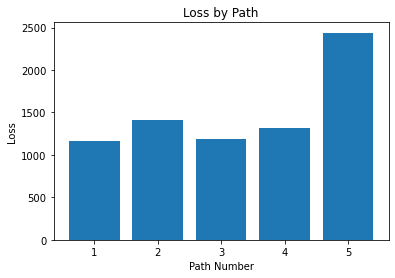

In [25]:
import seaborn as sns 

plt.title("Loss by Path")
plt.ylabel("Loss")
plt.xlabel("Path Number")
plt.bar([i+1 for i in range(len(total_loss))] ,[np.array(x.detach().cpu()) for x in total_loss])
plt.show()